<a href="https://colab.research.google.com/github/Aasia-Bibi/Student-Performance-Prediction-Data-Mining/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [3]:
import pandas as pd

data = pd.read_csv("/content/sample_data/student-mat.csv", sep=';')
print(data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [4]:
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

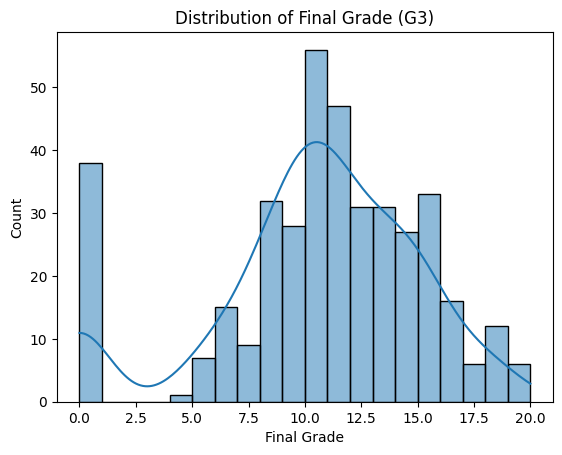

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['G3'], bins=20, kde=True)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()


In [6]:
# Create new column 'performance' based on G3
data['performance'] = pd.cut(data['G3'],
                             bins=[-1, 9, 13, 20],
                             labels=['Low', 'Medium', 'High'])
print(data['performance'].value_counts())


performance
Medium    165
Low       130
High      100
Name: count, dtype: int64


In [7]:
data_encoded = pd.get_dummies(data.drop('G3', axis=1), drop_first=True)


In [9]:
# Convert G3 (numeric final grade) to performance labels
data['performance'] = pd.cut(data['G3'],
                             bins=[-1, 9, 13, 20],
                             labels=['Low', 'Medium', 'High'])


In [10]:
data = data.drop('G3', axis=1)


In [11]:
data_encoded = pd.get_dummies(data.drop('performance', axis=1), drop_first=True)


In [12]:
X = data_encoded
y = data['performance']  # use the original performance column


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify ensures class balance
)


Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)



> Random Forest Classifier



In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.7848101265822784
Confusion Matrix:
 [[19  0  1]
 [ 0 19  7]
 [ 2  7 24]]
Classification Report:
               precision    recall  f1-score   support

        High       0.90      0.95      0.93        20
         Low       0.73      0.73      0.73        26
      Medium       0.75      0.73      0.74        33

    accuracy                           0.78        79
   macro avg       0.80      0.80      0.80        79
weighted avg       0.78      0.78      0.78        79



# ***Feature Importance Visualization***

## For Decision Tree:

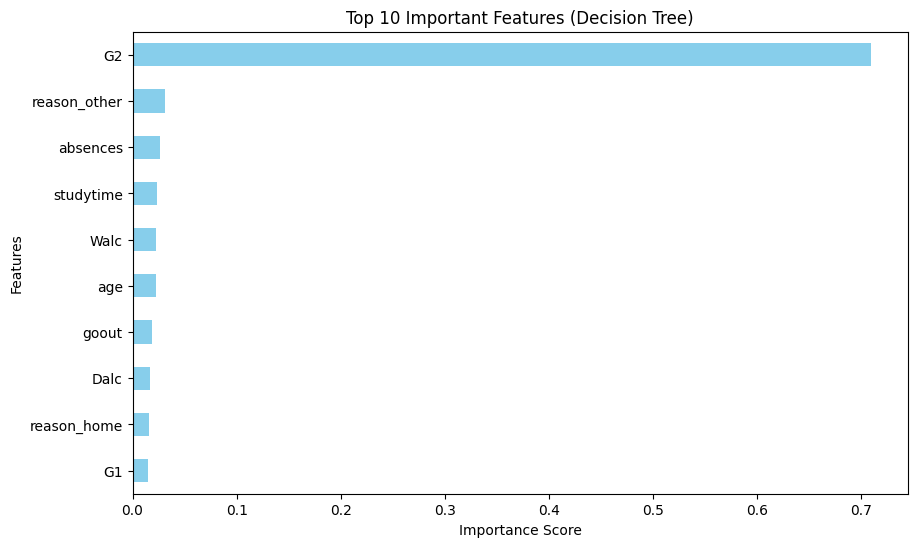

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importance values
importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns)

# Plot Top 10 features
plt.figure(figsize=(10, 6))
importance_dt.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()


## For Random Forest

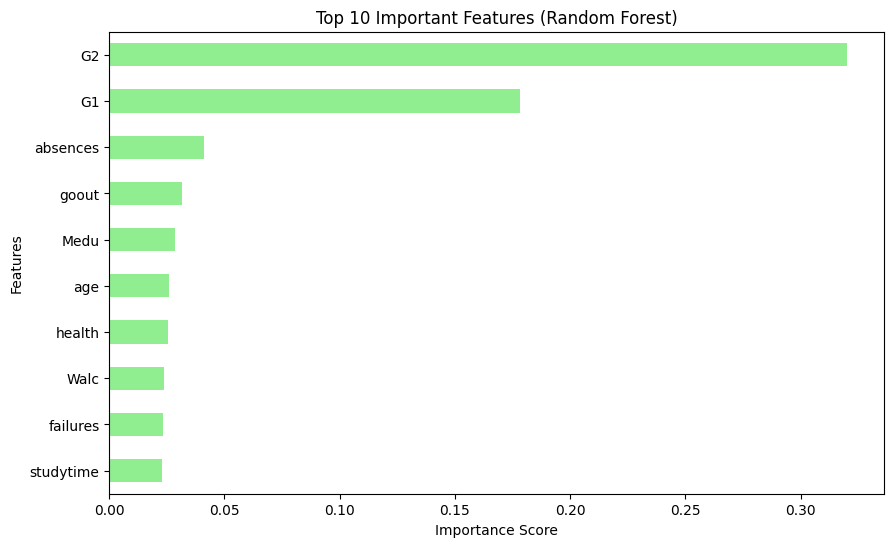

In [18]:
importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
importance_rf.nlargest(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()
